In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_sub = pd.read_csv("data/sample_submission.csv")

In [3]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
# Display dataset info (columns, types, missing values)  
# Ցուցադրում ենք dataset-ի ինֆորմացիան (սյունակներ, տիպեր, բացակայող տվյալներ)
train_info = df_train.info()
test_info = df_test.info()

train_info, test_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


(None, None)

In [5]:
# Calculate missing values percentage for train dataset  
# Հաշվում ենք բացակայող տվյալների տոկոսները train dataset-ի համար
missing_train = df_train.isnull().sum() / len(df_train) * 100

# Calculate missing values percentage for test dataset  
# Հաշվում ենք բացակայող տվյալների տոկոսները test dataset-ի համար
missing_test = df_test.isnull().sum() / len(df_test) * 10

In [6]:
# Create a dataframe for better visualization  
# Ստեղծում ենք dataframe ավելի հարմար դիտարկման համար
missing_data = pd.DataFrame({"Train Missing %": missing_train, "Test Missing %": missing_test})

In [7]:
print(missing_data)

          Train Missing %  Test Missing %
id               0.000000        0.000000
keyword          0.801261        0.079681
location        33.272035        3.386454
target           0.000000             NaN
text             0.000000        0.000000


target
0    4342
1    3271
Name: count, dtype: int64


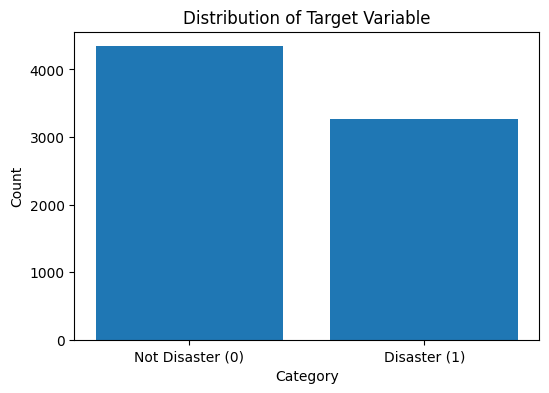

In [8]:
# Checking target variable distribution  
# Ստուգում ենք target փոփոխականի բաշխվածությունը

target_counts = df_train["target"].value_counts()
print(target_counts)

plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, tick_label=["Not Disaster (0)", "Disaster (1)"])
plt.xlabel("Category")  
plt.ylabel("Count")  
plt.title("Distribution of Target Variable") 
plt.show()

In [9]:
# Fill missing keywords with "missing"  
# Լրացնում ենք keyword դաշտի բացակայող արժեքները "missing" բառով
df_train["keyword"].fillna("missing", inplace=True)
df_test["keyword"].fillna("missing", inplace=True)

/tmp/ipykernel_119436/4180043033.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["keyword"].fillna("missing", inplace=True)
/tmp/ipykernel_119436/4180043033.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [10]:
df_train["keyword"].head(10)

0    missing
1    missing
2    missing
3    missing
4    missing
5    missing
6    missing
7    missing
8    missing
9    missing
Name: keyword, dtype: object

In [11]:
import re

In [13]:
basic_stopwords = {"a", "the", "is", "in", "at",
                   "to", "on", "and", "or", "of",
                   "for", "with", "as", "an", "by",
                   "from"}

stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself",
    "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which",
    "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be",
    "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for",
    "with", "about", "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further",
    "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few",
    "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too",
    "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

def clean_text(text):
    text = text.lower()
    
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    text = re.sub(r'\@\w+', 'someone', text)
    
    text = re.sub(r'#', '', text)
    
    emoji_dict = {":)": "smile", ":(": "sad", ":'(": "cry", "lol": "laugh"}
    for emoji, word in emoji_dict.items():
        text = text.replace(emoji, word)
    
    abbreviations = {"omg": "oh my god", "idk": "i don’t know", "brb": "be right back", "gtg": "got to go"}
    for abbr, full in abbreviations.items():
        text = text.replace(abbr, full)

    text = re.sub(r"[^\w\s]", '', text)
    
    words = text.split()
    
    words = [word for word in words if word not in stop_words]
    
    words = [word for word in words if word not in basic_stopwords]  
    
    return " ".join(words)

In [14]:
# df_train["clean_text"] = df_train["text"].apply(clean_text_simple)
# df_test["clean_text"] = df_test["text"].apply(clean_text_simple)
df_train["clean_text"] = df_train["text"].astype(str).apply(clean_text)
df_test["clean_text"] = df_test["text"].astype(str).apply(clean_text)

In [15]:
df_train[["text", "clean_text"]].head(10)

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...",13000 people receive wildfires evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...
5,#RockyFire Update => California Hwy. 20 closed...,rockyfire update california hwy 20 closed dire...
6,#flood #disaster Heavy rain causes flash flood...,flood disaster heavy rain causes flash floodin...
7,I'm on top of the hill and I can see a fire in...,im top hill see fire woods
8,There's an emergency evacuation happening now ...,theres emergency evacuation happening building...
9,I'm afraid that the tornado is coming to our a...,im afraid tornado coming area


In [16]:
X_train = df_train["clean_text"]
y_train = df_train["target"]

In [17]:
X_test = df_test["clean_text"]

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
# Ստեղծում ենք TF-IDF vectorizer  
# Create TF-IDF vectorizer  
vectorizer = TfidfVectorizer(max_features=5000)  # Max 5000 most important words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
# Տպում ենք արդյունքների չափերը (Feature matrix size)  
# Print feature matrix size  
print(f"TF-IDF Train Shape: {X_train_tfidf.shape}")  
print(f"TF-IDF Test Shape: {X_test_tfidf.shape}")

TF-IDF Train Shape: (7613, 5000)
TF-IDF Test Shape: (3263, 5000)


In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Train a Naive Bayes Model  
# Ուսուցանում ենք Naive Bayes մոդելը

In [23]:
# Բաժանում ենք train տվյալները train և validation մասերի  
# Splitting the training data into train and validation sets  
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

In [24]:
# Ստեղծում ենք Naive Bayes մոդելը  
# Creating a Naive Bayes model  
nb_model = MultinomialNB()

In [25]:
# Ուսուցանում ենք մոդելը train մասի վրա  
# Training the model on training data  
nb_model.fit(X_train_part, y_train_part)

MultinomialNB()

In [26]:
# Գուշակում ենք validation տվյալների համար  
# Predicting on validation data  
y_pred = nb_model.predict(X_val)

In [27]:
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

In [28]:
# Տպում ենք արդյունքները  
# Printing the results  
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", report)

Model Accuracy: 0.8011

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       874
           1       0.83      0.67      0.74       649

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [29]:
# Կատարում ենք կանխատեսում test տվյալների համար  
# Making predictions on test dataset  
test_predictions = nb_model.predict(X_test_tfidf)

In [30]:
# Ստեղծում ենք Kaggle-ի համար submission ֆայլը  
# Creating submission file for Kaggle  
df_sub = pd.DataFrame({"id": df_test["id"], "target": test_predictions})

In [31]:
df_sub.to_csv("data/sample_submission.csv", index=False)

In [32]:
df_sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [33]:
#Kaggle submission - 0.78823

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [35]:
# Optimize XGBoost with GridSearchCV  
# Օպտիմալացնում ենք XGBoost-ը՝ օգտագործելով GridSearchCV

In [36]:
# Սահմանում ենք XGBoost-ի համար հնարավոր լավագույն հիպերպարամետրերը  
# Defining possible best hyperparameters for XGBoost  
param_grid = {
    'n_estimators': [50, 75, 100, 150, 200],
    'max_depth': [2, 3, 4, 5, 6],
    'learning_rate': [0.1, 0.05, 0.025, 0.01]
}

In [37]:
# Ստեղծում ենք XGBoost մոդելը առանց հիպերպարամետրերի փոփոխման  
# Creating a basic XGBoost model without tuned hyperparameters  
xgb_model_base = XGBClassifier(random_state=42)

In [38]:
grid_search = GridSearchCV(xgb_model_base, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

In [39]:
# Ուսուցանում ենք GridSearchCV-ը՝ train տվյալների վրա  
# Training GridSearchCV on training data  
grid_search.fit(X_train_part, y_train_part)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.025, 0.01],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 75, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [40]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [41]:
xgb_best = XGBClassifier(**grid_search.best_params_, random_state=42)

In [42]:
xgb_best.fit(X_train_part, y_train_part)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [43]:
xgb_sub = xgb_best.predict(X_test_tfidf)

In [44]:
df_sub_xgb = pd.DataFrame({"id": df_test["id"], "target": xgb_sub})

In [45]:
df_sub_xgb.to_csv("data/sample_submission.csv", index=False)

In [47]:
#Kaggle submission - 0.76064